<div style="text-align: center; color: white; background-color: #559cff; font-weight: bold; padding: 20px" >
 <p style="font-size: 40px"> Final Project - Programming for Data Science 📚</p>
 <p style="font-size: 30px"> <u>Question 3:</u> How has music evolved over the years? 📈</p>

</div>


---

## Member Information 👬
| Name              | ID       |
|-------------------|----------|
| Nguyen Khanh Nhan | 21127657         |
| Tran Dai Nien     | 21127664 |

## Table of contents 📑
- [1. Question](#1-question) <br> 
    - [1.1 The purpose of the question](#11-the-purpose-of-the-question)<br>
    - [1.2 How to solve the question](#12-how-to-solve-the-question)
- [2. Solution](#2-solution) <br>
    - [2.1 Pre-processing data](#21-pre-processing-data)<br>
    - [2.2 Data analysis](#22-data-analysis)<br>
    - [2.3 Answer the question](#23-answer-the-question)<br>
---

## 1. Question

<p style="font-size: 30px;"><strong>📈 How has music evolved over the years?</strong></p>

### 1.1 The purpose of the question

✅Answering this question allows you to explore the evolution of `music genres`, `new trends`, and changes in `musical styles` or `music's features` over decades. It not only provides knowledge about the development of music but also helps you understand the **relationship** between `music` and the `factors/features` that contribute to creating a successful piece of music. This understanding lays the foundation for creativity and brings joy and discovery in exploring the world of music.

### 1.2 How to solve the question

- We will identify the elements of a song such as `bpm`, `danceability`, `energy`, `valence`, `acousticness`, `instrumentalness`, `liveness`, and `speechiness` and observe their changes over the years.
- Each year, we will calculate the average values of these song elements for that year and plot them on a `line chart` to observe their changes over the years.
- Finally, we will observe the changes of these elements over the years to draw conclusions.

## 2. Solution

### 2.1 Pre-processing data

🔧 import all the necessary libraries and read the data from the csv file.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
df = pd.read_csv('./data/processed_spotify-2023.csv')
df.sample(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
604,212,"Mainstreet, Chefin",2,2022,1,15,352,0.0,1.431393e+08,10,...,154,D,Minor,79,86,52,66,0,9,7
791,El Rescate,"Grupo Marca Registrada, Junior H",2,2022,7,22,527,4.0,2.872789e+08,10,...,99,G,Minor,79,64,59,28,0,11,14
302,on the street (with J. Cole),"j-hope, J. Cole",2,2023,3,3,615,2.0,1.165998e+08,22,...,94,B,Minor,68,81,82,53,0,9,13
671,Ain't Shit,Doja Cat,1,2021,6,25,3436,0.0,4.997106e+08,32,...,124,D#,Major,86,62,49,51,0,35,21
667,There's Nothing Holdin' Me Back,Shawn Mendes,1,2016,9,23,12382,0.0,1.714491e+09,229,...,122,D,Major,86,97,80,36,0,9,6


🔧 Identify the elements of a song such as `bpm`, `danceability`, `energy`, `valence`, `acousticness`, `instrumentalness`, `liveness`, and `speechiness` and then compute the average values of these song elements for each year.

In [6]:
song_features = ['bpm', 'danceability_%', 'energy_%', 'valence_%', 'acousticness_%', 
                 'instrumentalness_%', 'liveness_%', 'speechiness_%']

average_features_by_year = df.groupby('released_year')[song_features].mean()

### 2.2 Data analysis

🕵️ Look at the trends in `bpm` over the years.

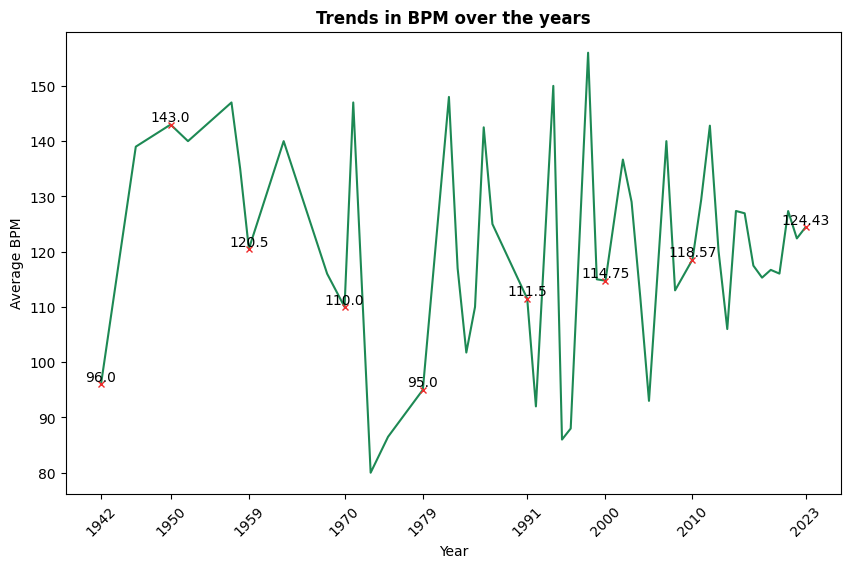

In [35]:
years = [1942, 1950, 1959, 1970, 1979, 1991, 2000, 2010, 2023]
values = average_features_by_year['bpm'][years].values

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=average_features_by_year.index, y=average_features_by_year['bpm'].values, ax=ax, color='#1d8954')
ax.set_xticks(years)
ax.set_xticklabels(years, rotation=45)
ax.xaxis.set_major_locator(ticker.FixedLocator(years))
ax.set_title('Trends in BPM over the years', fontweight='bold')
ax.set_xlabel('Year')
ax.set_ylabel('Average BPM')

for i, j in zip(years, values):
    ax.annotate(str(round(j, 2)), xy=(i, j), ha='center', va='bottom')
    ax.plot(i, j, marker='x', color='#EE2C2C', markersize=5)

plt.show()

✅**Comment:** 
-  We can see here that the `BPM` stays in that range of `100-130` in average, and that each year has its tempo, while still staying in that range of rythm. As I said, it moves a lot in the older years than in the most recent ones because there are way less songs than in `2018-2023` in the top of `Spotify`.

🕵️ Look at the trends in `danceability`, `energy` and `valence` over the years.

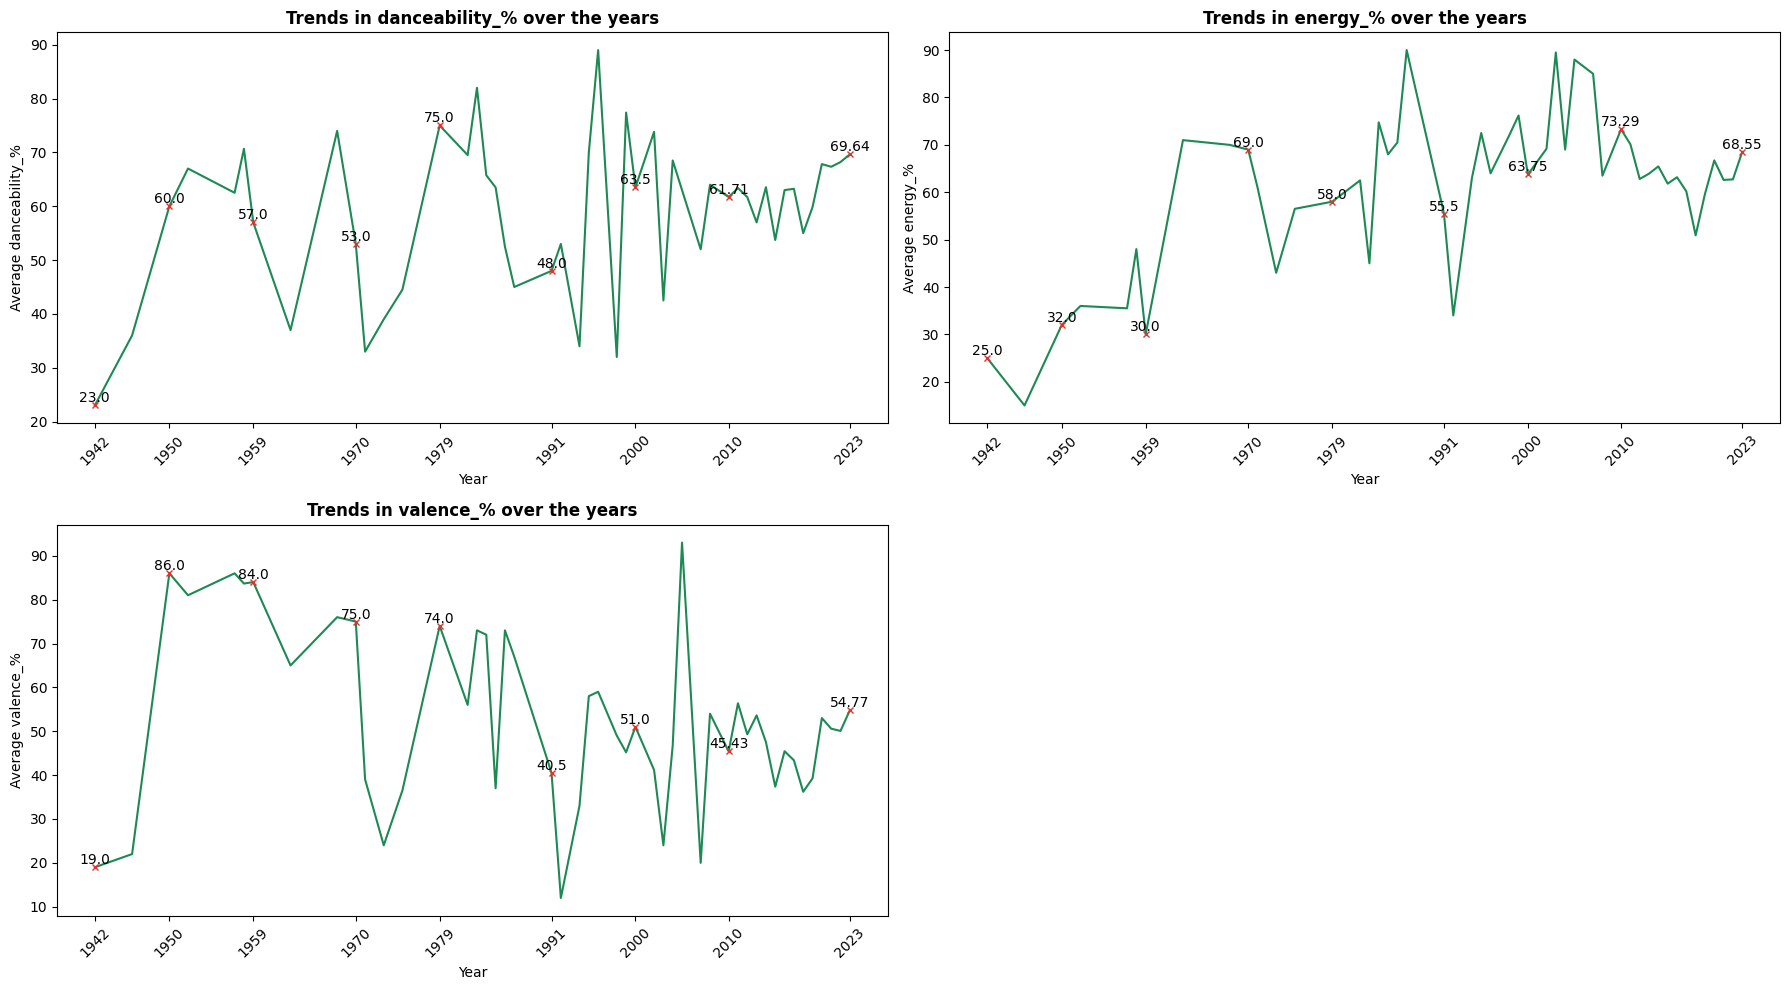

In [36]:
cols = song_features[1:4]
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i in range(3):
    values = average_features_by_year[cols[i]][years].values
    sns.lineplot(x=average_features_by_year.index, y=average_features_by_year[cols[i]].values, ax=axes[i//2, i%2], color='#1d8954')
    axes[i//2, i%2].set_xticks(years)
    axes[i//2, i%2].set_xticklabels(years, rotation=45)
    axes[i//2, i%2].xaxis.set_major_locator(ticker.FixedLocator(years))
    axes[i//2, i%2].set_title(f'Trends in {cols[i]} over the years', fontweight='bold')
    axes[i//2, i%2].set_xlabel('Year')
    axes[i//2, i%2].set_ylabel(f'Average {cols[i]}')
    
    for x, y in zip(years, values):
        axes[i//2, i%2].annotate(str(round(y, 2)), xy=(x, y), ha='center', va='bottom')
        axes[i//2, i%2].plot(x, y, marker='x', color='#EE2C2C', markersize=5)
        
axes[1, 1].set_visible(False)
plt.tight_layout()
plt.show()

✅**Comment:**
- It seems that `danceability` of songs is slowly increasing over the years. This is probably because people are more likely to listen to songs with `a higher danceability score`. The highest danceability score is in the late 20th century (`~ 90%`), which is probably because people were more likely to dance to songs in that era.
- Just like `danceability`, songs are slowly more and more `energic` over the years, averaging about `70%` today.
- `Valence` reached its highest point in the `1950s` of the `20th` century before hitting a low in the 1990s. It then experienced a sudden increase in the early 21st century, followed by a subsequent decrease and has remained relatively stable in the past decade.

🕵️ Finally, look at the trends in `acousticness`, `instrumentalness`, `liveness`, and `speechiness` over the years.

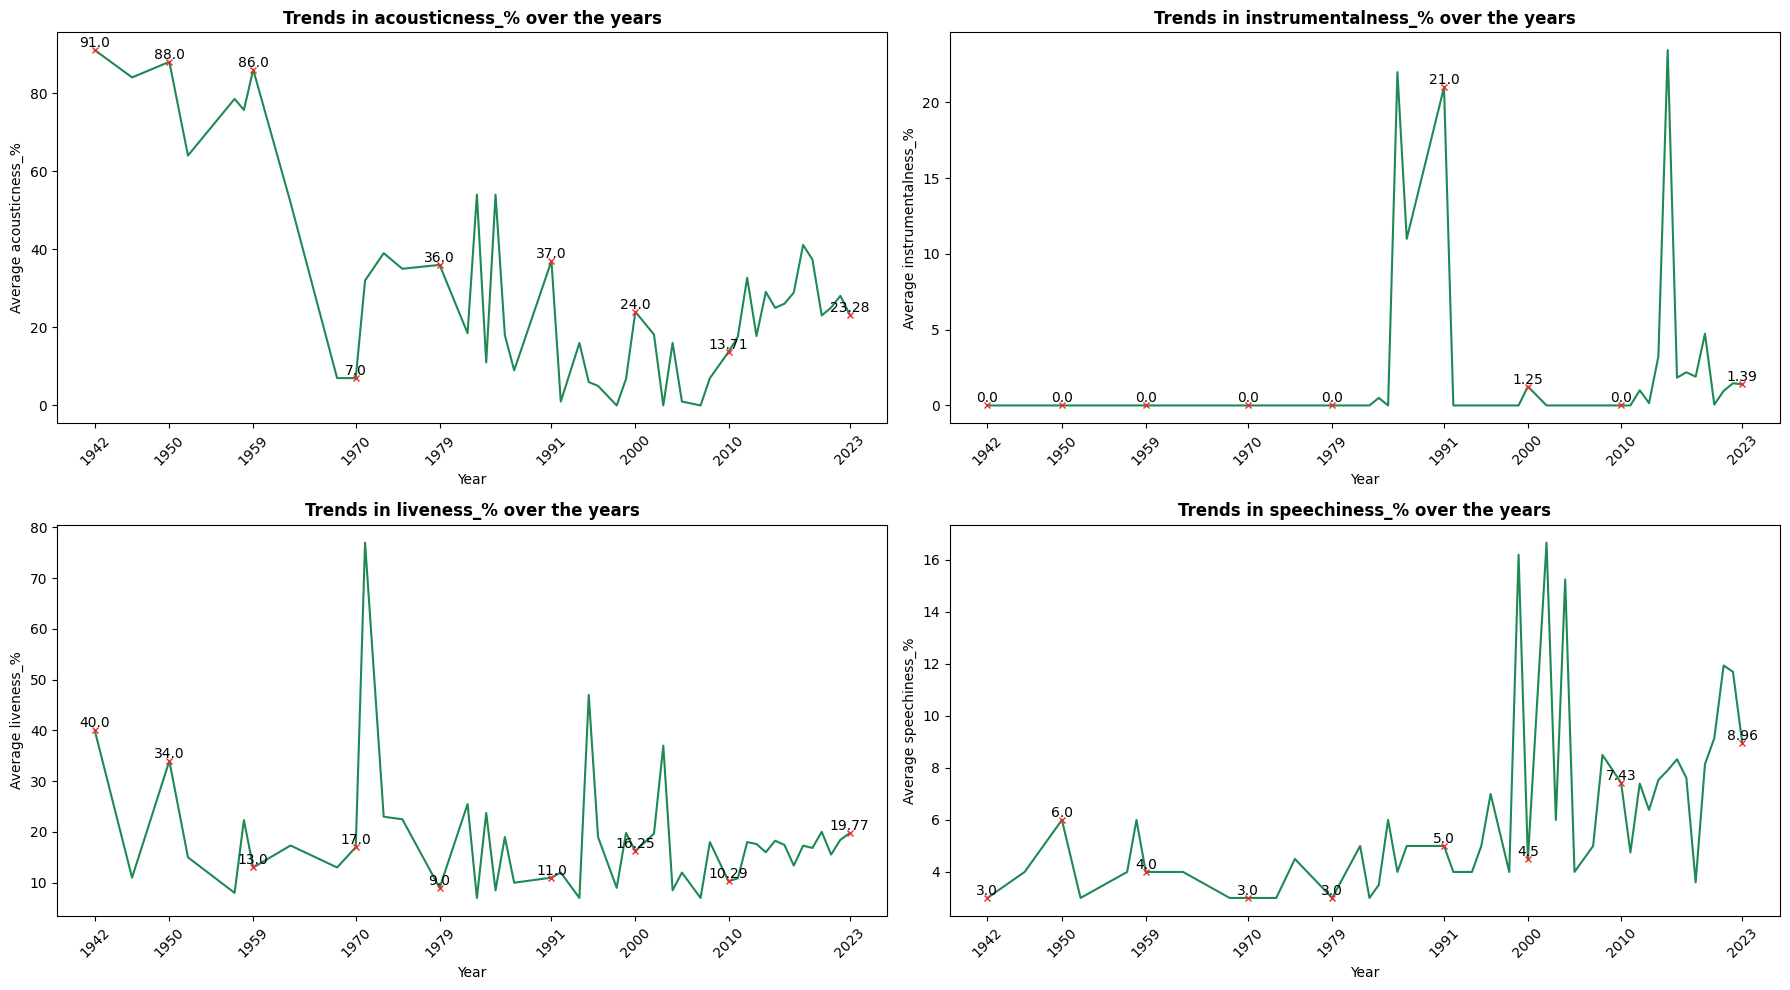

In [38]:
cols = song_features[4:]
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
for i in range(4):
    values = average_features_by_year[cols[i]][years].values
    sns.lineplot(x=average_features_by_year.index, y=average_features_by_year[cols[i]].values, ax=axes[i//2, i%2], color='#1d8954')
    axes[i//2, i%2].set_xticks(years)
    axes[i//2, i%2].set_xticklabels(years, rotation=45)
    axes[i//2, i%2].xaxis.set_major_locator(ticker.FixedLocator(years))
    axes[i//2, i%2].set_title(f'Trends in {cols[i]} over the years', fontweight='bold')
    axes[i//2, i%2].set_xlabel('Year')
    axes[i//2, i%2].set_ylabel(f'Average {cols[i]}')
    
    for x, y in zip(years, values):
        axes[i//2, i%2].annotate(str(round(y, 2)), xy=(x, y), ha='center', va='bottom')
        axes[i//2, i%2].plot(x, y, marker='x', color='#EE2C2C', markersize=5)
        
plt.tight_layout()
plt.show()

✅**Comment:**
- In opposition, we can see that `acousticness` is **slowly decreasing**, with a little increasing bump around `2010`, but it seems that it is, again, going down.
- `Instrumentalness` was used mostly between `1980` and `1990`, just like `acousticness`, around `2010`. Other than that, no `intrumentalness` can be found in the top songs of Spotify.
- If we focus only on the most recent years, it seems that `liveness` is **slowly going up**, while starting from a really low percentage.
- `Speechiness` seems to **slowly increase** too over the years. It exhibited unusual fluctuations in the early 21st century up until the present day.

### 2.3 Answer the question

✅ Throughout its development over the years, music has undergone notable changes. While the average `BPM (beats per minute)` of songs has generally remained within the range of `100-130`, it has shown a more stable trend in recent years. This could be attributed to the significant increase in the number of songs on `Spotify` during this period. Additionally, other factors such as `danceability`, `energy`, and `valence` have shown an upward trend over the years. This indicates that music listeners increasingly prefer songs that are `danceable`, `energetic`, and evoke `positive emotions`. However, there are also certain elements like `acousticness (the degree of non-electronic sounds)`, `instrumentalness (the degree of songs without lyrics)`, `liveness (the degree of live performance)`, and `speechiness (the degree of spoken words in a song)` that have exhibited uneven changes over the years. Overall, music has evolved and adapted to cater to the preferences and trends of listeners in different time periods.